#### 2 dosyayı birleştirme

In [75]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# load and merge files
#transaction_data = pd.read_excel("transaction_data_v2.xlsx")
#demographical_data = pd.read_excel("demographical_data_v2.xlsx")

#df_fs = pd.merge(transaction_data, demographical_data, on="Customer_id", how="left")
#df_fs .to_excel("df_fs.xlsx", index=False)

In [143]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df_fs = pd.read_excel("missing_but_together_data_v3.xlsx")
slope_df = pd.read_excel("slope.xlsx")
MA_df = pd.read_excel("MA.xlsx")
df_fs["trxdate"] = pd.to_datetime(df_fs["trxdate"]).dt.strftime('%Y-%m')

merged_df = pd.merge(df_fs, slope_df, how="left", on=["Customer_id", "trxdate"])
merged_df = pd.merge(merged_df, MA_df, how="left", on=["Customer_id", "trxdate"])

In [145]:
# Unnamed sütunları kaldırma
merged_df = merged_df.drop(columns=merged_df.columns[merged_df.columns.str.contains('Unnamed')])
print(merged_df.head())

   Customer_id  trxdate   MCCPI  Quantity  TotalInstallmentCount  amountlc  \
0         1108  2024-02  6010.0         2                      0    603.90   
1         1108  2023-08  6010.0         2                      0    504.84   
2         1108  2024-01  6010.0         2                      0    612.90   
3         1108  2023-10  6010.0         2                      0    610.90   
4         1108  2023-09  6010.0         2                      0    551.69   

   TotalAmountLC  IsContactLess  IsMagnetic  IsECommerce  ...  Age  \
0         603.90              0         NaN          NaN  ...   52   
1         504.84              0         NaN          NaN  ...   52   
2         612.90              0         NaN          NaN  ...   52   
3         610.90              0         NaN          NaN  ...   52   
4         551.69              0         NaN          NaN  ...   52   

         EmployementType  EmployerSector JobTitle City  CitycCode  County  \
0  Serbest Meslek Sahibi      Öze

In [146]:
filtered_df = merged_df[(merged_df['EmployementType'] == 'Ücretli') & (merged_df['EmployerSector'].isnull())]
print(filtered_df['Customer_id'].unique())

[95713345]


#### Veriyi Tanıma

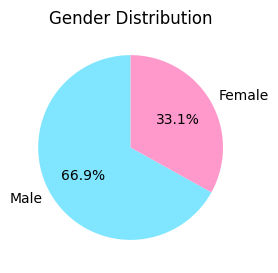

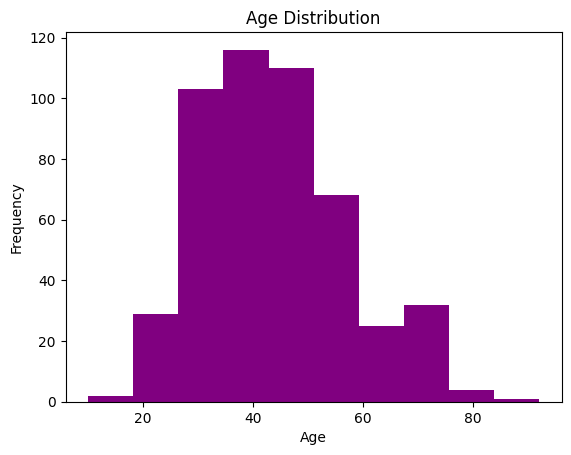

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Demografik verileri yükleyin
demographical_data = pd.read_excel("demographical_data_v2.xlsx")

# Cinsiyet Dağılımı
gender_counts = demographical_data['Gender'].value_counts().rename(index={0: 'Male', 1: 'Female'})
colors = [(0.5, 0.9, 1), (1, 0.6, 0.8)] 
plt.figure(figsize=(3, 3))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')
plt.show()

# Yaş Dağılımı
demographical_data['Age'].plot.hist(color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


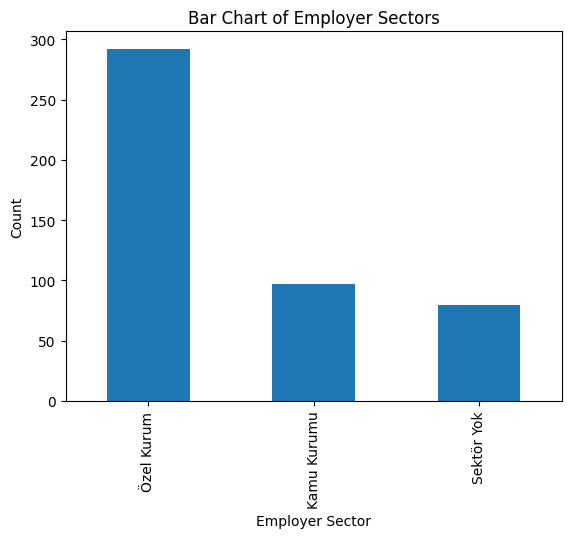

In [148]:
sector_counts = demographical_data['EmployerSector'].value_counts()

sector_counts.plot(kind='bar')
plt.xlabel('Employer Sector')
plt.ylabel('Count')
plt.title('Bar Chart of Employer Sectors')
plt.show()

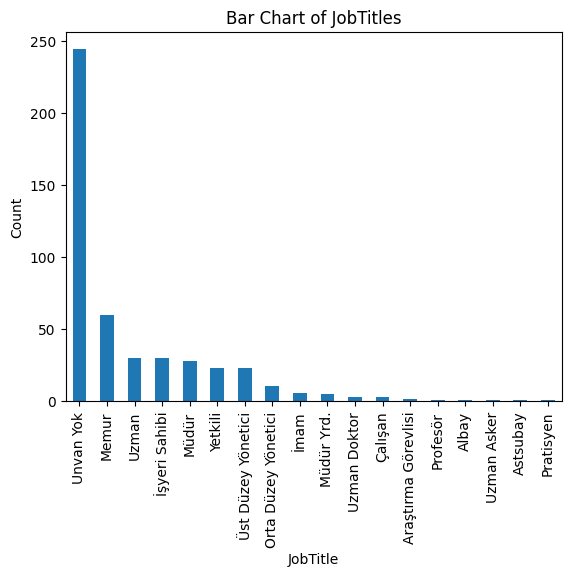

In [149]:
sector_counts = demographical_data['JobTitle'].value_counts()

sector_counts.plot(kind='bar')
plt.xlabel('JobTitle')
plt.ylabel('Count')
plt.title('Bar Chart of JobTitles')
plt.show()

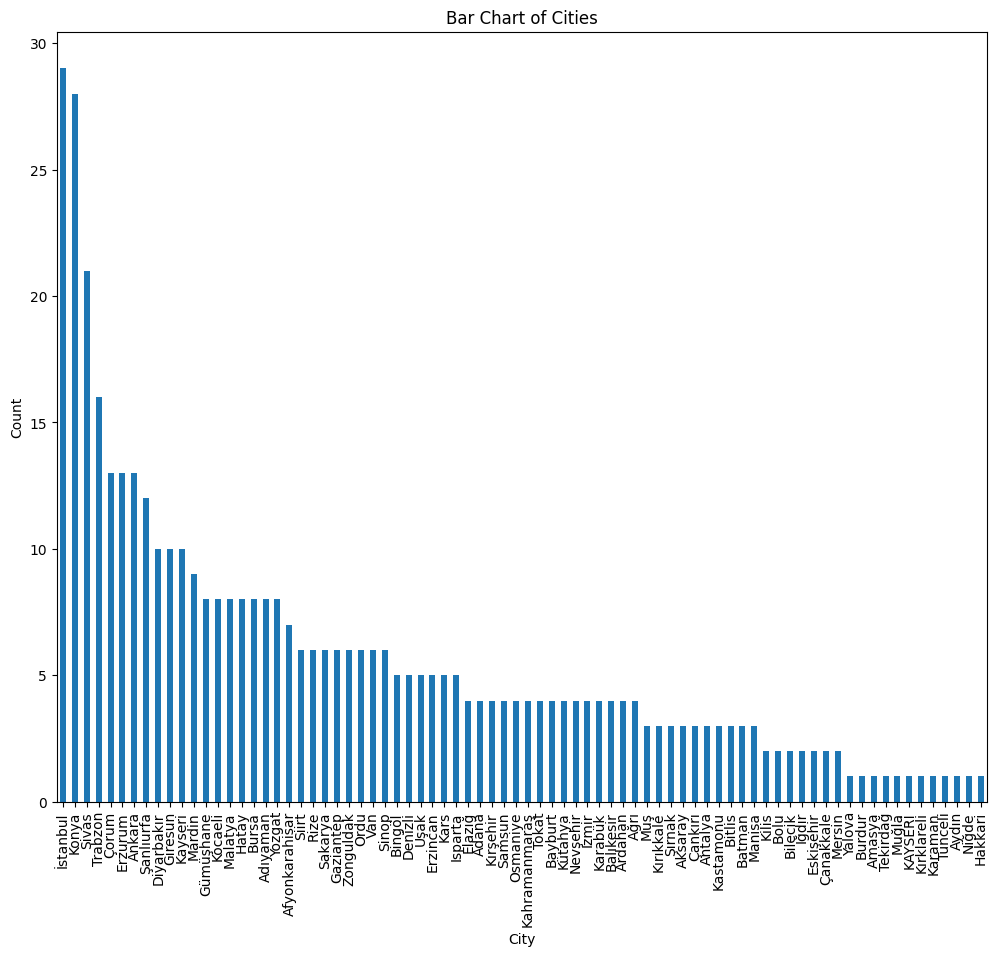

In [150]:
city_counts =  demographical_data['City'].value_counts()

plt.figure(figsize=(12, 10))
city_counts.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Bar Chart of Cities')
plt.show()

#### Handling the Null Values

In [151]:
import pandas as pd

# merged_df'den sadece MaritalStatus değeri boş olan satırları seç
boş_marital_satır = merged_df[merged_df['MaritalStatus'].isnull()]

# boş_marital_satır'daki customer_id'leri bul
boş_customer_ids = boş_marital_satır['Customer_id']

# boş_customer_ids'ye sahip olan tüm satırları merged_df'den sil
merged_df = merged_df[~merged_df['Customer_id'].isin(boş_customer_ids)]

# Silinen satır sayısını kontrol et
silinen_satır_sayısı = len(boş_marital_satır)
print("Silinen satır sayısı:", silinen_satır_sayısı)


Silinen satır sayısı: 0


##### Sektörü Olmayan Hücrelere Sektör Yok Eklenmesi

In [152]:
condition = merged_df['EmployementType'].isin(['Çalışmıyor', 'Emekli Çalışan', 'Serbest Meslek Sahibi'])

# Bu satırların 'EmployerSector' değerini 'Sektör Yok' olarak ayarla
merged_df.loc[condition, 'EmployerSector'] = 'Sektör Yok'

# null ve ücretliler silindi
isveren_df = merged_df [(merged_df['EmployementType']=='Ücretli') & (merged_df['EmployerSector'].isnull())]
for customer_id in isveren_df['Customer_id'].unique():
    rows_to_drop = merged_df[merged_df['Customer_id'] == customer_id]
    merged_df.drop(rows_to_drop.index, inplace=True)


isveren_indexes =merged_df.index[merged_df['EmployementType'] == 'İşveren']
merged_df.loc[isveren_indexes, 'EmployerSector'] = 'Özel Kurum'
 
esnaf_indexes =merged_df.index[merged_df['EmployementType'] == 'Tacir/Esnaf']
merged_df.loc[esnaf_indexes, 'EmployerSector'] = 'Özel Kurum'

filtered_df = merged_df[merged_df['EmployerSector'].isnull()]
unique_customers = filtered_df['Customer_id'].unique()
 
# Her bir unique müşterinin EmployementType değerini yazdır
for customer_id in unique_customers:
    Employement_type = merged_df.loc[merged_df['Customer_id'] == customer_id, 'EmployementType'].iloc[0]
    print(f"Customer ID: {customer_id}, EmployementType: {Employement_type}")

merged_df.isnull().sum()

Customer_id                  0
trxdate                      0
MCCPI                        3
Quantity                     0
TotalInstallmentCount        0
amountlc                     0
TotalAmountLC                0
IsContactLess                0
IsMagnetic               11964
IsECommerce              11964
alacak_borc                  0
CLV                          0
Accomodation                 0
BirthDate                    0
BranchName                   0
Citizenship                  0
Gender                       0
MaritalStatus                0
ProfessionCode               0
ValueSegment                 0
RecordingTime                0
SesLevel                     0
EducationLevelPI             0
AcommodationPI               0
Age                          0
EmployementType              0
EmployerSector               0
JobTitle                    64
City                       425
CitycCode                 1238
County                     429
CountryCode               1238
Slope   

In [153]:

merged_df.drop(columns=["trxdate"], inplace=True)


In [154]:
merged_df.isnull().sum()

Customer_id                  0
MCCPI                        3
Quantity                     0
TotalInstallmentCount        0
amountlc                     0
TotalAmountLC                0
IsContactLess                0
IsMagnetic               11964
IsECommerce              11964
alacak_borc                  0
CLV                          0
Accomodation                 0
BirthDate                    0
BranchName                   0
Citizenship                  0
Gender                       0
MaritalStatus                0
ProfessionCode               0
ValueSegment                 0
RecordingTime                0
SesLevel                     0
EducationLevelPI             0
AcommodationPI               0
Age                          0
EmployementType              0
EmployerSector               0
JobTitle                    64
City                       425
CitycCode                 1238
County                     429
CountryCode               1238
Slope                     8783
Moving_A

In [155]:
null_MCCPI_rows = merged_df[merged_df['MCCPI'].isnull()]
print(null_MCCPI_rows)


      Customer_id  MCCPI  Quantity  TotalInstallmentCount  amountlc  \
1726        35520    NaN         1                      0     82.85   
2594     99008242    NaN         2                      0  15761.37   
3987     95706238    NaN         2                      0   1712.96   

      TotalAmountLC  IsContactLess  IsMagnetic  IsECommerce  alacak_borc  ...  \
1726          82.85              0         NaN          NaN            2  ...   
2594       15761.37              0         NaN          NaN            2  ...   
3987        1712.96              0         NaN          NaN            1  ...   

      Age  EmployementType EmployerSector   JobTitle      City  CitycCode  \
1726   58          Ücretli    Kamu Kurumu      Uzman  İstanbul       34.0   
2594   42          Ücretli     Özel Kurum      Uzman         0        NaN   
3987   44       Çalışmıyor     Sektör Yok  Unvan Yok     Sivas       58.0   

         County  CountryCode Slope Moving_Average  
1726    Kadıköy       1421.0 

1 milyonluk datada 51 tane maritalstatus değeri 0 olan satır vardı. Sadece bu satırları yok etmek müşterinin o satırdaki harcamasını da yok edeceği için verinin güvenilirliğini sabit tutmak adına sadece ilgili satır değil, o müşteri ve müşteriye ait tüm satırlar silindi.

In [156]:
import pandas as pd

# Excel dosyalarını oku
MCCPI_old_df = pd.read_excel("MCCPI_old.xlsx")
# merged_df de MCCPI değeri null olan satırların MCCPI değerine "Empty" diyelim

# MCCPI değerlerine göre Category'leri eşleştir
category_map = dict(zip(MCCPI_old_df['MCCPI'], MCCPI_old_df['Category']))

# MCCPI değerlerini içeren sütunun bulunduğu merged_df'e yeni sütunu ekle
merged_df['MCCPI_category'] = merged_df['MCCPI'].map(category_map)

merged_df.loc[merged_df['MCCPI_category'].isnull(), 'MCCPI_category'] = 'Boş'

# MCCPI_category sütununda bulunan her bir kategorinin sayısını hesapla
category_counts = merged_df['MCCPI_category'].value_counts()
print(category_counts)



MCCPI_category
Market ve Alışveriş Merkezleri            1476
Giyim ve Aksesuar                         1369
Hizmet Sektörleri                         1334
Çeşitli Gıda                              1160
Yemek                                      952
Diğer                                      933
Sağlık/Sağlık Ürünleri/Kozmetik            818
Benzin ve Yakıt İstasyonları               512
Doğrudan Pazarlama                         502
Elektrik-Elektronik Eşya, Bilgisayar       463
Eğitim / Kırtasiye / Ofis Malzemeleri      418
Seyahat Acenteleri/Taşımacılık             405
Mobilya ve Dekorasyon                      280
Araç Kiralama-Satış/Servis/Yedek Parça     249
Yapı Malzemeleri, Hırdavat, Nalburiye      207
Sigorta                                    198
Telekomünikasyon                           178
Kamu/Vergi Odemeleri                       137
Havayolları                                111
Kulüp / Dernek /Sosyal Hizmetler            83
Konaklama                                   8

In [157]:
import pandas as pd

# Excel dosyalarını oku
MCCPI_df = pd.read_excel("MCCPI.xlsx")

# MCCPI değerlerine göre Category'leri eşleştir
category_map = dict(zip(MCCPI_df['MCCPI'], MCCPI_df['MCCPI_category']))


# MCCPI değerini içeren sütunun bulunduğu merged_df'e yeni sütunu ekle
merged_df['MCCPI_category'] = merged_df['MCCPI'].map(category_map)
merged_df.loc[merged_df['MCCPI_category'].isnull(), 'MCCPI_category'] = 'Boş'

# MCCPI_category sütununda bulunan her bir kategorinin sayısını hesapla
category_counts = merged_df['MCCPI_category'].value_counts()

print(category_counts)


MCCPI_category
Yemek ve Gıda                            2112
Market ve Alışveriş Merkezleri           1476
Giyim ve Aksesuar                        1369
Hizmet Sektörleri                        1334
Diğer                                     933
Sağlık/Sağlık Ürünleri/Kozmetik           818
Benzin ve Yakıt İstasyonları              512
Doğrudan Pazarlama                        502
Elektrik-Elektronik Eşya, Bilgisayar      463
Eğitim / Kırtasiye / Ofis Malzemeleri     418
Seyahat Acenteleri/Taşımacılık            405
Mobilya ve Dekorasyon                     280
Araç Hizmetleri                           268
Yapı Malzemeleri, Hırdavat, Nalburiye     207
Sigorta                                   198
Telekomünikasyon                          178
Kamu/Vergi Odemeleri                      137
Havayolları                               111
Kulüp / Dernek /Sosyal Hizmetler           83
Konaklama                                  81
Müteahhit İşleri                           49
Kuyumcular         

Yemek ve Çeşitli Gıda kategorileri Yemek ve Gıda Kategorisi altında birleştirildi.
Araç Kiralama-Satış/Servis/Yedek Parça ve Araba Kiralama kateogirileri Araç Hizmetleri kategorisi altında birleştirildi. Category değerleri NaN, Boş ile değiştirildi.

In [158]:
merged_df.isnull().sum()

Customer_id                  0
MCCPI                        3
Quantity                     0
TotalInstallmentCount        0
amountlc                     0
TotalAmountLC                0
IsContactLess                0
IsMagnetic               11964
IsECommerce              11964
alacak_borc                  0
CLV                          0
Accomodation                 0
BirthDate                    0
BranchName                   0
Citizenship                  0
Gender                       0
MaritalStatus                0
ProfessionCode               0
ValueSegment                 0
RecordingTime                0
SesLevel                     0
EducationLevelPI             0
AcommodationPI               0
Age                          0
EmployementType              0
EmployerSector               0
JobTitle                    64
City                       425
CitycCode                 1238
County                     429
CountryCode               1238
Slope                     8783
Moving_A

In [159]:
import pandas as pd

# CitiesofBranch dosyasını oku
cities_of_branch = pd.read_excel("CitiesofBranch.xlsx")

# merged_df içinde City değeri null olan satırları filtrele
null_city_rows = merged_df[merged_df['City'].isnull()]

# Her bir null olan City değeri için işlem yap
for index, row in null_city_rows.iterrows():
    # Null olan City değerine karşılık gelen BranchName'i al
    branch_name = row['BranchName']
    
    # CitiesofBranch dosyasındaki ilgili BranchName'e karşılık gelen CityName değerini bul
    city_name = cities_of_branch.loc[cities_of_branch['branchname'] == branch_name, 'CityName'].values
    
    # Eğer eşleşen bir CityName değeri varsa, bu değeri null olan City değerine yaz
    if len(city_name) > 0:
        merged_df.at[index, 'City'] = city_name[0]

# Sonucu kontrol etmek için ilk 10 satırı yazdır
print(merged_df.head(10))


   Customer_id   MCCPI  Quantity  TotalInstallmentCount  amountlc  \
0         1108  6010.0         2                      0    603.90   
1         1108  6010.0         2                      0    504.84   
2         1108  6010.0         2                      0    612.90   
3         1108  6010.0         2                      0    610.90   
4         1108  6010.0         2                      0    551.69   
5         1108  6010.0         2                      0    591.90   
6         1108  6010.0         2                      0    645.90   
7         1108  6010.0         2                      0    479.90   
8         1651  6010.0         2                      0    485.50   
9         1651  6010.0         1                      0    347.90   

   TotalAmountLC  IsContactLess  IsMagnetic  IsECommerce  alacak_borc  ...  \
0         603.90              0         NaN          NaN            2  ...   
1         504.84              0         NaN          NaN            2  ...   
2     

In [160]:
merged_df.isnull().sum()

Customer_id                  0
MCCPI                        3
Quantity                     0
TotalInstallmentCount        0
amountlc                     0
TotalAmountLC                0
IsContactLess                0
IsMagnetic               11964
IsECommerce              11964
alacak_borc                  0
CLV                          0
Accomodation                 0
BirthDate                    0
BranchName                   0
Citizenship                  0
Gender                       0
MaritalStatus                0
ProfessionCode               0
ValueSegment                 0
RecordingTime                0
SesLevel                     0
EducationLevelPI             0
AcommodationPI               0
Age                          0
EmployementType              0
EmployerSector               0
JobTitle                    64
City                         0
CitycCode                 1238
County                     429
CountryCode               1238
Slope                     8783
Moving_A

##### Deleting the Columns that has a lot of null variables or have high correlation with other columns

In [161]:
#Varsayımlar Dokümana eklenmeli

columns_to_drop = ["IsMagnetic", "IsECommerce", "CitycCode", "CountryCode", "BranchName", "County", "IsContactLess"]  # Doğru sütun isimlerini kullanın
merged_df.drop(columns=columns_to_drop, inplace=True)

#### Filling Null JobTitle Values

In [162]:

pd.set_option('display.max_rows', None)
# JobTitle sütunundaki tüm farklı değerleri yazdır
unique_jobtitles = merged_df['JobTitle'].unique()
print('Values that JobTitle can take: ', unique_jobtitles)


# Jobtitle değeri null olan müşterilerin profession code ve employersector değerlerini yazdır
null_jobtitle_rows = merged_df[merged_df['JobTitle'].isnull()]
ProfessionCode_JobTitle_null = null_jobtitle_rows['ProfessionCode'].unique()
print('Profession Codes that has null Job Titles: ', ProfessionCode_JobTitle_null )

Values that JobTitle can take:  ['Müdür' nan 'Unvan Yok' 'Memur' 'Üst Düzey Yönetici' 'Yetkili'
 'İşyeri Sahibi' 'Uzman' 'Orta Düzey Yönetici' 'İmam' 'Müdür Yrd.'
 'Uzman Asker' 'Astsubay' 'Uzman Doktor' 'Çalışan' 'Pratisyen' 'Vaiz'
 'Doktor' 'Subay' 'Araştırma Görevlisi' 'Müezzin' 'Okutman']
Profession Codes that has null Job Titles:  [24 39  5 76 25]


##### JobTitle değeri null olan hücrelere Unvan Yok değerinin eklenmesi

In [163]:
merged_df['JobTitle'].fillna('Unvan Yok', inplace=True)


### Handling Data Types

In [164]:
merged_df.dtypes

Customer_id                       int64
MCCPI                           float64
Quantity                          int64
TotalInstallmentCount             int64
amountlc                        float64
TotalAmountLC                   float64
alacak_borc                       int64
CLV                             float64
Accomodation                      int64
BirthDate                datetime64[ns]
Citizenship                       int64
Gender                            int64
MaritalStatus                     int64
ProfessionCode                    int64
ValueSegment                     object
RecordingTime            datetime64[ns]
SesLevel                          int64
EducationLevelPI                  int64
AcommodationPI                    int64
Age                               int64
EmployementType                  object
EmployerSector                   object
JobTitle                         object
City                             object
Slope                           float64


##### Deleting the BirthDate

In [165]:
# Eski RecordingTime ve BirthDate sütunlarını düşürün
merged_df.drop(columns=['BirthDate'], inplace=True)

##### Changing Recording Time to Tenure

In [166]:
import pandas as pd

# Bugünkü tarihi alın
today_date = pd.to_datetime('today').strftime('%Y-%m-%d')

# RecordingTime değerlerini müşteri olma tarihlerine çevirin
merged_df['RecordingTime'] = pd.to_datetime(merged_df['RecordingTime']).dt.strftime('%Y-%m-%d')

# Müşterinin kaç yıllık müşteri olduğunu hesaplayın
merged_df['Tenure'] = (pd.to_datetime(today_date) - pd.to_datetime(merged_df['RecordingTime'])).dt.days / 365
merged_df.drop(columns=['RecordingTime'], inplace=True)

#### Encoding the ValueSegment

In [167]:
ValueSegment_encoded = pd.get_dummies(merged_df['ValueSegment'], prefix='ValueSegment')

# Boolean değerleri 1 ve 0 olarak değiştirelim
ValueSegment_encoded = ValueSegment_encoded.astype(int)

# Yeni sütunları asıl DataFrame'e ekleyelim
merged_df = pd.concat([merged_df, ValueSegment_encoded], axis=1)

# Artık orijinal sütunu silebiliriz
merged_df.drop('ValueSegment', axis=1, inplace=True)

print(merged_df.head())

   Customer_id   MCCPI  Quantity  TotalInstallmentCount  amountlc  \
0         1108  6010.0         2                      0    603.90   
1         1108  6010.0         2                      0    504.84   
2         1108  6010.0         2                      0    612.90   
3         1108  6010.0         2                      0    610.90   
4         1108  6010.0         2                      0    551.69   

   TotalAmountLC  alacak_borc      CLV  Accomodation  Citizenship  ...  \
0         603.90            2  1207.80             1            2  ...   
1         504.84            2  1009.68             1            2  ...   
2         612.90            2  1225.80             1            2  ...   
3         610.90            2  1221.80             1            2  ...   
4         551.69            2  1103.38             1            2  ...   

   JobTitle      City  Slope  Moving_Average  MCCPI_category    Tenure  \
0     Müdür  İstanbul    NaN             NaN           Diğer  5.03

#### Encoding the JobTitle

In [168]:
JobTitle_encoded = pd.get_dummies(merged_df['JobTitle'], prefix='JobTitle')

# Boolean değerleri 1 ve 0 olarak değiştirelim
JobTitle_encoded = JobTitle_encoded.astype(int)

# Yeni sütunları asıl DataFrame'e ekleyelim
merged_df = pd.concat([merged_df, JobTitle_encoded], axis=1)

# Artık orijinal sütunu silebiliriz
merged_df.drop('JobTitle', axis=1, inplace=True)

print(merged_df.head())

   Customer_id   MCCPI  Quantity  TotalInstallmentCount  amountlc  \
0         1108  6010.0         2                      0    603.90   
1         1108  6010.0         2                      0    504.84   
2         1108  6010.0         2                      0    612.90   
3         1108  6010.0         2                      0    610.90   
4         1108  6010.0         2                      0    551.69   

   TotalAmountLC  alacak_borc      CLV  Accomodation  Citizenship  ...  \
0         603.90            2  1207.80             1            2  ...   
1         504.84            2  1009.68             1            2  ...   
2         612.90            2  1225.80             1            2  ...   
3         610.90            2  1221.80             1            2  ...   
4         551.69            2  1103.38             1            2  ...   

   JobTitle_Unvan Yok  JobTitle_Uzman  JobTitle_Uzman Asker  \
0                   0               0                     0   
1             

In [169]:
EmployementType_encoded = pd.get_dummies(merged_df['EmployementType'], prefix='EmployementType')

# Boolean değerleri 1 ve 0 olarak değiştirelim
EmployementType_encoded = EmployementType_encoded.astype(int)

# Yeni sütunları asıl DataFrame'e ekleyelim
merged_df = pd.concat([merged_df, EmployementType_encoded], axis=1)

# Artık orijinal sütunu silebiliriz
merged_df.drop('EmployementType', axis=1, inplace=True)

print(merged_df.head())

   Customer_id   MCCPI  Quantity  TotalInstallmentCount  amountlc  \
0         1108  6010.0         2                      0    603.90   
1         1108  6010.0         2                      0    504.84   
2         1108  6010.0         2                      0    612.90   
3         1108  6010.0         2                      0    610.90   
4         1108  6010.0         2                      0    551.69   

   TotalAmountLC  alacak_borc      CLV  Accomodation  Citizenship  ...  \
0         603.90            2  1207.80             1            2  ...   
1         504.84            2  1009.68             1            2  ...   
2         612.90            2  1225.80             1            2  ...   
3         610.90            2  1221.80             1            2  ...   
4         551.69            2  1103.38             1            2  ...   

   JobTitle_İmam  JobTitle_İşyeri Sahibi  EmployementType_Emekli  \
0              0                       0                       0   
1   

In [170]:
EmployerSector_encoded = pd.get_dummies(merged_df['EmployerSector'], prefix='EmployerSector')

# Boolean değerleri 1 ve 0 olarak değiştirelim
EmployerSector_encoded = EmployerSector_encoded.astype(int)

# Yeni sütunları asıl DataFrame'e ekleyelim
merged_df = pd.concat([merged_df, EmployerSector_encoded], axis=1)

# Artık orijinal sütunu silebiliriz
merged_df.drop('EmployerSector', axis=1, inplace=True)

print(merged_df.head(2))
print(merged_df.dtypes)

   Customer_id   MCCPI  Quantity  TotalInstallmentCount  amountlc  \
0         1108  6010.0         2                      0    603.90   
1         1108  6010.0         2                      0    504.84   

   TotalAmountLC  alacak_borc      CLV  Accomodation  Citizenship  ...  \
0         603.90            2  1207.80             1            2  ...   
1         504.84            2  1009.68             1            2  ...   

   EmployementType_Emekli Çalışan  EmployementType_Serbest Meslek Sahibi  \
0                               0                                      1   
1                               0                                      1   

   EmployementType_Tacir/Esnaf  EmployementType_Çalışmıyor  \
0                            0                           0   
1                            0                           0   

   EmployementType_Öğrenci  EmployementType_Ücretli  EmployementType_İşveren  \
0                        0                        0                      

####  City yi GeographicalReqion ile Değiştirme

In [171]:
# Türkiye'nin coğrafi bölgelerini tanımlama
geographical_regions = {
    'Marmara': ['Edirne', 'Kırklareli', 'Tekirdağ', 'İstanbul', 'Kocaeli', 'Yalova', 'Sakarya', 'Bilecik', 'Bursa', 'Balıkesir', 'Çanakkale'],
    'İç Anadolu': ['Aksaray', 'Ankara', 'Çankırı', 'Eskişehir', 'Karaman', 'Kırıkkale', 'Kırşehir', 'Konya', 'Nevşehir', 'Niğde', 'Sivas', 'Yozgat', 'Kayseri'],
    'Ege': ['İzmir', 'Manisa', 'Aydın', 'Denizli', 'Kütahya', 'Afyonkarahisar', 'Uşak', 'Muğla'],
    'Akdeniz': ['Adana', 'Osmaniye', 'Antalya', 'Burdur', 'Hatay', 'Isparta', 'Mersin', 'Kahramanmaraş'],
    'Karadeniz': ['Rize', 'Trabzon', 'Artvin', 'Sinop', 'Tokat', 'Çorum', 'Amasya', 'Samsun', 'Zonguldak', 'Bolu', 'Düzce', 'Karabük', 'Bartın', 'Kastamonu', 'Bayburt', 'Giresun', 'Gümüşhane', 'Ordu'],
    'Doğu Anadolu': ['Ağrı', 'Ardahan', 'Bingöl', 'Bitlis', 'Elazığ', 'Erzincan', 'Erzurum', 'Hakkari', 'Iğdır', 'Kars', 'Malatya', 'Muş', 'Tunceli', 'Van', 'Şırnak'],
    'Güneydoğu Anadolu': ['Adıyaman', 'Batman', 'Diyarbakır', 'Gaziantep', 'Kilis', 'Mardin', 'Siirt', 'Şanlıurfa']
}

# Her bir ilin hangi coğrafi bölgede olduğunu belirleme
def get_region(city):
    for region, cities in geographical_regions.items():
        if city in cities:
            return region
    return None  # Eğer coğrafi bölgeye dahil değilse "Diğer" olarak işaretleyelim

# Her bir il için coğrafi bölge sütunu oluşturma
merged_df['GeographicalRegion'] = merged_df['City'].apply(get_region)

print(merged_df[['City', 'GeographicalRegion']].tail(12))
print(merged_df.dtypes)


            City GeographicalRegion
12003     Samsun          Karadeniz
12004    Trabzon          Karadeniz
12005   İstanbul            Marmara
12006    Isparta            Akdeniz
12007     Yozgat         İç Anadolu
12008   Tekirdağ            Marmara
12009    Giresun          Karadeniz
12010  Gümüşhane          Karadeniz
12011  Şanlıurfa  Güneydoğu Anadolu
12012      Konya         İç Anadolu
12013    Aksaray         İç Anadolu
12014    Erzurum       Doğu Anadolu
Customer_id                                int64
MCCPI                                    float64
Quantity                                   int64
TotalInstallmentCount                      int64
amountlc                                 float64
TotalAmountLC                            float64
alacak_borc                                int64
CLV                                      float64
Accomodation                               int64
Citizenship                                int64
Gender                                    

#### Geographical  Region Encoding

In [172]:
GeographicalRegion_encoded = pd.get_dummies(merged_df['GeographicalRegion'], prefix='GeographicalRegion')

# Boolean değerleri 1 ve 0 olarak değiştirelim
GeographicalRegion_encoded = GeographicalRegion_encoded.astype(int)

# Yeni sütunları asıl DataFrame'e ekleyelim
merged_df = pd.concat([merged_df, GeographicalRegion_encoded], axis=1)

# Artık orijinal sütunu silebiliriz
merged_df.drop('City', axis=1, inplace=True)
merged_df.drop('GeographicalRegion', axis=1, inplace=True)

print(merged_df.tail(2))
print(merged_df.dtypes)


       Customer_id   MCCPI  Quantity  TotalInstallmentCount  amountlc  \
12013     93904290  5541.0         3                      0   2085.06   
12014     93652751  5541.0         5                      0   6150.35   

       TotalAmountLC  alacak_borc       CLV  Accomodation  Citizenship  ...  \
12013        2085.06            2   6255.18             1            1  ...   
12014        6150.35            2  30751.75             1            1  ...   

       EmployerSector_Kamu Kurumu  EmployerSector_Sektör Yok  \
12013                           1                          0   
12014                           0                          1   

       EmployerSector_Özel Kurum  GeographicalRegion_Akdeniz  \
12013                          0                           0   
12014                          0                           0   

       GeographicalRegion_Doğu Anadolu  GeographicalRegion_Ege  \
12013                                0                       0   
12014                   

In [173]:
MCCPI_category_encoded = pd.get_dummies(merged_df['MCCPI_category'], prefix='MCCPI_category')

# Boolean değerleri 1 ve 0 olarak değiştirelim
MCCPI_category_encoded = MCCPI_category_encoded.astype(int)

# Yeni sütunları asıl DataFrame'e ekleyelim
merged_df = pd.concat([merged_df, MCCPI_category_encoded], axis=1)

# Artık orijinal sütunu silebiliriz
merged_df.drop('MCCPI', axis=1, inplace=True)
merged_df.drop('MCCPI_category', axis=1, inplace=True)

print(merged_df.tail(2))
print(merged_df.dtypes)

       Customer_id  Quantity  TotalInstallmentCount  amountlc  TotalAmountLC  \
12013     93904290         3                      0   2085.06        2085.06   
12014     93652751         5                      0   6150.35        6150.35   

       alacak_borc       CLV  Accomodation  Citizenship  Gender  ...  \
12013            2   6255.18             1            1       0  ...   
12014            2  30751.75             1            1       0  ...   

       MCCPI_category_Kuyumcular  \
12013                          0   
12014                          0   

       MCCPI_category_Market ve Alışveriş Merkezleri  \
12013                                              0   
12014                                              0   

       MCCPI_category_Mobilya ve Dekorasyon  MCCPI_category_Müteahhit İşleri  \
12013                                     0                                0   
12014                                     0                                0   

       MCCPI_category_S

In [174]:
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('^Unnamed')]
merged_df.head()

,Customer_id,Quantity,TotalInstallmentCount,amountlc,TotalAmountLC,alacak_borc,CLV,Accomodation,Citizenship,Gender,...,MCCPI_category_Kuyumcular,MCCPI_category_Market ve Alışveriş Merkezleri,MCCPI_category_Mobilya ve Dekorasyon,MCCPI_category_Müteahhit İşleri,MCCPI_category_Sağlık/Sağlık Ürünleri/Kozmetik,MCCPI_category_Seyahat Acenteleri/Taşımacılık,MCCPI_category_Sigorta,MCCPI_category_Telekomünikasyon,"MCCPI_category_Yapı Malzemeleri, Hırdavat, Nalburiye",MCCPI_category_Yemek ve Gıda
0,1108,2,0,603.90,603.90,2,1207.80,1,2,0,...,0,0,0,0,0,0,0,0,0,0
1,1108,2,0,504.84,504.84,2,1009.68,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1108,2,0,612.90,612.90,2,1225.80,1,2,0,...,0,0,0,0,0,0,0,0,0,0
3,1108,2,0,610.90,610.90,2,1221.80,1,2,0,...,0,0,0,0,0,0,0,0,0,0
4,1108,2,0,551.69,551.69,2,1103.38,1,2,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
merged_df.isnull().sum()

Customer_id                                                0
Quantity                                                   0
TotalInstallmentCount                                      0
amountlc                                                   0
TotalAmountLC                                              0
alacak_borc                                                0
CLV                                                        0
Accomodation                                               0
Citizenship                                                0
Gender                                                     0
MaritalStatus                                              0
ProfessionCode                                             0
SesLevel                                                   0
EducationLevelPI                                           0
AcommodationPI                                             0
Age                                                        0
Slope                   

In [176]:
# DataFrame'deki null değerleri 0 ile değiştirme
merged_df['Moving_Average'].fillna(0, inplace=True)
merged_df['Slope'].fillna(0, inplace=True)
merged_df.isnull().sum()


Customer_id                                             0
Quantity                                                0
TotalInstallmentCount                                   0
amountlc                                                0
TotalAmountLC                                           0
alacak_borc                                             0
CLV                                                     0
Accomodation                                            0
Citizenship                                             0
Gender                                                  0
MaritalStatus                                           0
ProfessionCode                                          0
SesLevel                                                0
EducationLevelPI                                        0
AcommodationPI                                          0
Age                                                     0
Slope                                                   0
Moving_Average

In [177]:
#merged_df.to_excel("cleaned275kData.xlsx")

In [178]:
#import os

# Öncelikle, birleştirilmiş DataFrame'i okuyalım
#cleaned_merged_275k_df = pd.read_excel('cleaned275kData.xlsx')

# Adımları belirleyelim
#steps = [
    (50000, 50000),
    (40000, 40000),
    (30000, 30000),
    (20000, 20000),
    (10000, 10000),
    (5000, 5000),
    (50000, 1000),
    (50000, 3000),
    (50000, 5000),
    (50000, 10000),
    (50000, 20000),
    (50000, 30000),
    (50000, 40000)
]

# Her adım için dosyaları oluşturalım
#for i, (churn_0_count, churn_1_count) in enumerate(steps):
    churn_0_rows = cleaned_merged_275k_df[cleaned_merged_275k_df['Churn'] == 0][:churn_0_count]
    churn_1_rows = cleaned_merged_275k_df[cleaned_merged_275k_df['Churn'] == 1][:churn_1_count]
    file_df = pd.concat([churn_0_rows, churn_1_rows])
    
    # Dosya adını oluşturalım
    file_name = f"file_{churn_0_count}_Churn_{churn_1_count}_NonChurn.xlsx"
    file_df.to_excel(file_name, index=False)
    print(f"{file_name} dosyası oluşturuldu.")



IndentationError: unexpected indent (1801578007.py, line 8)

In [ ]:
merged_df.dtypes

Customer_id                                               int64
Quantity                                                  int64
TotalInstallmentCount                                     int64
amountlc                                                float64
TotalAmountLC                                           float64
alacak_borc                                               int64
Accomodation                                              int64
Citizenship                                               int64
Gender                                                    int64
MaritalStatus                                             int64
ProfessionCode                                            int64
SesLevel                                                  int64
EducationLevelPI                                          int64
AccommodationPI                                           int64
Age                                                       int64
Churn                                   

In [ ]:
merged_df.isnull().sum()

Customer_id                                             0
Quantity                                                0
TotalInstallmentCount                                   0
amountlc                                                0
TotalAmountLC                                           0
alacak_borc                                             0
Accomodation                                            0
Citizenship                                             0
Gender                                                  0
MaritalStatus                                           0
ProfessionCode                                          0
SesLevel                                                0
EducationLevelPI                                        0
AccommodationPI                                         0
Age                                                     0
Churn                                                   0
Slope                                                   0
Moving_Average

In [ ]:
merged_df.shape

(52412, 85)

Korelasyon Analizi

Decision Tree

In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = merged_df.drop(columns=["Churn"])
y = merged_df["Churn"]
# Veri setini eğitim, doğrulama ve test setlerine ayırın
X_train_tree_withCI, X_temp_tree_withCI, y_train_tree, y_temp_tree = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid_treeCI, X_test_tree_withCI, y_valid_tree, y_test_tree = train_test_split(X_temp_tree_withCI, y_temp_tree, test_size=0.5, random_state=42)
# Decision Tree modelini oluşturun ve eğitin
X_test_tree = X_test_tree_withCI.iloc[:, 1:]
X_valid_tree = X_valid_treeCI.iloc[:, 1:]
X_temp_tree = X_temp_tree_withCI.iloc[:, 1:]
X_train_tree = X_train_tree_withCI.iloc[:, 1:]
model_tree = DecisionTreeClassifier(max_depth=25, random_state=42)
model_tree.fit(X_train_tree, y_train_tree)

# Eğitim setinde modelin performansını değerlendir
y_train_pred_tree = model_tree.predict(X_train_tree)
train_accuracy_tree = accuracy_score(y_train_tree, y_train_pred_tree)
train_precision_tree = precision_score(y_train_tree, y_train_pred_tree)
train_recall_tree = recall_score(y_train_tree, y_train_pred_tree)
train_f1_tree = f1_score(y_train_tree, y_train_pred_tree)

print("Training Metrics:")
print("Accuracy:", train_accuracy_tree)
print("Precision:", train_precision_tree)
print("Recall:", train_recall_tree)
print("F1 Score:", train_f1_tree)
print()

# Doğrulama setinde modelin performansını değerlendir
y_valid_pred_tree = model_tree.predict(X_valid_tree)
valid_accuracy_tree = accuracy_score(y_valid_tree, y_valid_pred_tree)
valid_precision_tree = precision_score(y_valid_tree, y_valid_pred_tree)
valid_recall_tree = recall_score(y_valid_tree, y_valid_pred_tree)
valid_f1_tree = f1_score(y_valid_tree, y_valid_pred_tree)

print("Validation Metrics:")
print("Accuracy:", valid_accuracy_tree)
print("Precision:", valid_precision_tree)
print("Recall:", valid_recall_tree)
print("F1 Score:", valid_f1_tree)
print()


KeyError: "['Churn'] not found in axis"

In [ ]:
# Test setinde modelin tahmin ettiği churn olasılıklarını alın
y_probabilities = model_tree.predict_proba(X_test_tree)[:, 1]

# Her bir müşteri kimliğiyle churn olasılıklarını eşleştirin
results_df = pd.DataFrame({
    'customer_id': X_test_tree_withCI.iloc[:, 0],  # Müşteri kimliklerini alın
    'churn_probability': y_probabilities  # Churn olasılıklarını alın
})

# Sonuçları yazdırın
results_df.to_csv("decisionTree_probabilities.csv")


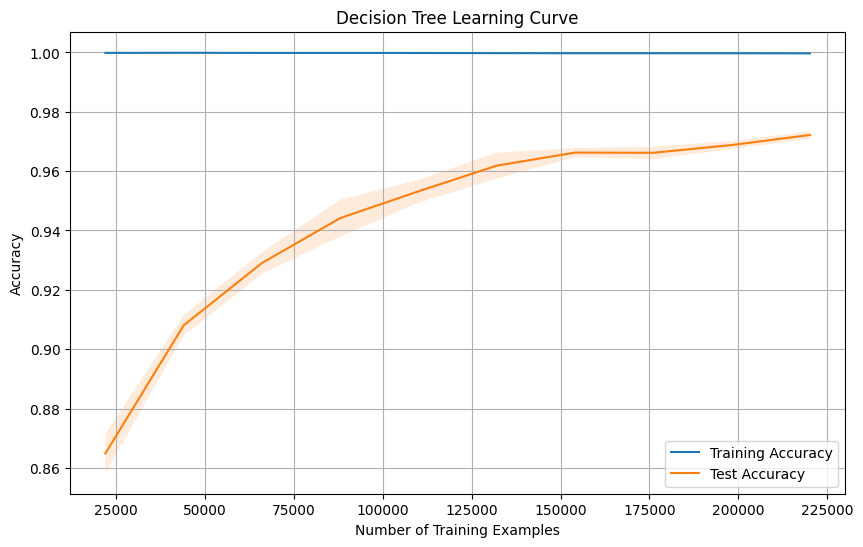

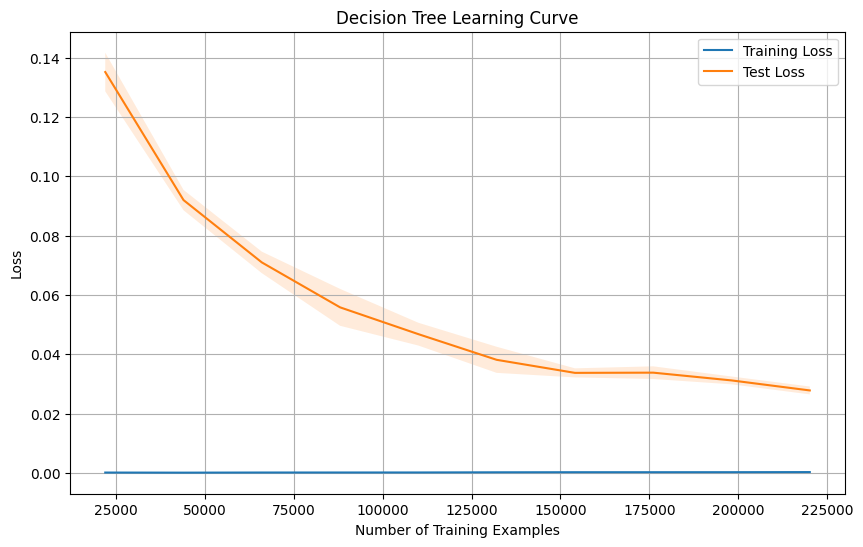

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Decision tree modelinin learning curve'ünü oluşturun
train_sizes, train_scores, val_scores = learning_curve(
    DecisionTreeClassifier(random_state=42), X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Eğitim seti ve doğrulama seti için ortalama ve standart sapmaları hesaplayın
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Learning curve'ü çizin
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, val_mean, label='Test Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15)
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Decision Tree Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_squared_error

# Mean Squared Error'i scoring parametresi olarak kullanacak bir scorer oluşturun
mse_scorer = make_scorer(mean_squared_error)

# Decision tree modelinin learning curve'ünü oluşturun
train_sizes, train_scores, val_scores = learning_curve(
    DecisionTreeClassifier(random_state=42), X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring=mse_scorer)

# Eğitim seti ve doğrulama seti için ortalama ve standart sapmaları hesaplayın
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Learning curve'ü çizin
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, val_mean, label='Test Loss')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15)
plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.title('Decision Tree Learning Curve')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# X veri kümesinden ilk sütunu (indeks veya ID sütunu) çıkar
X_without_index = X.iloc[:, 1:]  # İlk sütunu atla, geri kalan sütunları al

# Özelliklerin önem sırasını al
feature_importances = model_tree.feature_importances_

# Özellikler ve önem sıralarını eşleştir
feature_importance_df = pd.DataFrame({'Feature': X_without_index.columns, 'Importance': feature_importances})

# Churn özelliğini çıkar
feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'Churn']

# Önem sıralarına göre azalan şekilde sırala
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Önem sıralarını görselleştir
plt.figure(figsize=(14, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Önem sıralarına göre artan şekilde sırala
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# En az önemli 10 özelliği görselleştir
plt.figure(figsize=(14, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 40 Least Important Features')
plt.gca().invert_yaxis()
plt.show()

# Özelliklerin önem sıralarını yazdır
print("Feature Importance:")
for index, row in feature_importance_df.iterrows():
    #print(f"{row['Feature']}: {row['Importance']}")


SyntaxError: incomplete input (3564722317.py, line 40)

In [180]:
print(len(feature_importances))
print(len(X.columns))


92
93


In [ ]:
# Özelliklerin önem sıralarını al
feature_importances = model_tree.feature_importances_

# Özellikler ve önem sıralarını eşleştir
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Önem sırası binde birden az olan özellikleri veriden çıkar
threshold = 0.01
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

# Seçilen özelliklerle yeni bir veri seti oluştur
X_selected = X[selected_features]

# Yeni veri setini tekrar eğitim ve test setlerine ayır
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Yeni bir Decision Tree modeli oluştur
model_tree_selected = DecisionTreeClassifier(random_state=42)

# Modeli eğitim seti ile eğitin
model_tree_selected.fit(X_train_selected, y_train_selected)

# Modelin performansını değerlendir
y_pred_selected = model_tree_selected.predict(X_test_selected)

accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
precision_selected = precision_score(y_test_selected, y_pred_selected)
recall_selected = recall_score(y_test_selected, y_pred_selected)
f1_selected = f1_score(y_test_selected, y_pred_selected)

# Modelin performansını değerlendir
y_train_pred_selected = model_tree_selected.predict(X_train_selected)

train_accuracy_selected = accuracy_score(y_train_selected, y_train_pred_selected)
train_precision_selected = precision_score(y_train_selected, y_train_pred_selected)
train_recall_selected = recall_score(y_train_selected, y_train_pred_selected)
train_f1_selected = f1_score(y_train_selected, y_train_pred_selected)

# Performans metriklerini yazdır
print("Selected Features Model Accuracy (Train):", train_accuracy_selected)
print("Selected Features Model Precision (Train):", train_precision_selected)
print("Selected Features Model Recall (Train):", train_recall_selected)
print("Selected Features Model F1 Score (Train):", train_f1_selected)
print()
print("Selected Features Model Accuracy (Test):", accuracy_selected)
print("Selected Features Model Precision (Test):", precision_selected)
print("Selected Features Model Recall (Test):", recall_selected)
print("Selected Features Model F1 Score (Test):", f1_selected)



ValueError: All arrays must be of the same length

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Separate features and target
X = merged_df.drop('Churn', axis=1)  # all columns except Churn
y = merged_df['Churn']  # Churn column

# Create an oversampler object
oversampler = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the transform
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Convert the resampled features and labels back into a DataFrame
oversample_df = pd.DataFrame(X_resampled, columns=X.columns)
oversample_df['Churn'] = y_resampled

# Check the new class distribution
print(oversample_df['Churn'].value_counts())

# Separate features and target again from the oversampled data
X = oversample_df.drop('Churn', axis=1)
y = oversample_df['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Evaluate the model on the train set
y_train_pred = log_reg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate the model on the test set
y_test_pred = log_reg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print performance metrics
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)
print()
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

Churn
0    46580
1    46580
Name: count, dtype: int64
Training Accuracy: 0.5397166165736368
Training Precision: 0.52759525715243
Training Recall: 0.760524832971102
Training F1 Score: 0.6229998241603658

Test Accuracy: 0.5392335766423357
Test Precision: 0.5270250148898153
Test Recall: 0.7602835356030502
Test F1 Score: 0.6225212153189993


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini oluşturun
rf_model_forest = RandomForestClassifier(random_state=42)
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitim seti ile eğitin
rf_model_forest.fit(X_train_forest, y_train_forest)

# Modelin test seti üzerinde tahmin yapmasını sağlayın
y_pred_forest = rf_model_forest.predict(X_test_forest)

y_train_pred_forest = rf_model_forest.predict(X_train_forest)
train_accuracy_forest = accuracy_score(y_train_forest, y_train_pred_forest)
train_precision_forest = precision_score(y_train_forest, y_train_pred_forest)
train_recall_forest = recall_score(y_train_forest, y_train_pred_forest)
train_f1_forest = f1_score(y_train_forest, y_train_pred_forest)

# Test setinde modelin performansını değerlendir
y_test_pred_forest = rf_model_forest.predict(X_test_forest)
test_accuracy_forest = accuracy_score(y_test_forest, y_test_pred_forest)
test_precision_forest = precision_score(y_test_forest, y_test_pred_forest)
test_recall_forest = recall_score(y_test_forest, y_test_pred_forest)
test_f1_forest = f1_score(y_test_forest, y_test_pred_forest)

# Performans metriklerini yazdır
print("Training Accuracy_forest:", train_accuracy_forest)
print("Training Precision_forest:", train_precision_forest)
print("Training Recall_forest:", train_recall_forest)
print("Training F1 Score_forest:", train_f1_forest)
print()
print("Test Accuracy_forest:", test_accuracy_forest)
print("Test Precision_forest:", test_precision_forest)
print("Test Recall_forest:", test_recall_forest)
print("Test F1 Score_forest:", test_f1_forest)


Training Accuracy_forest: 0.9757540790038643
Training Precision_forest: 0.9562789500772002
Training Recall_forest: 0.9971021492393142
Training F1 Score_forest: 0.9762639729932089

Test Accuracy_forest: 0.9307106054100472
Test Precision_forest: 0.8825605800419767
Test Recall_forest: 0.9935560090215874
Test F1 Score_forest: 0.9347749204264133


SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'oversample_df' is your DataFrame and 'Churn' is the target variable
X = merged_df.drop('Churn', axis=1)
y = merged_df['Churn']

# Sample setup, assuming data is loaded into X (features) and y (labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=55)

# Creating the LinearSVC model
svm_model = LinearSVC(random_state=55)
svm_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = svm_model.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     37276
           1       0.09      0.00      0.00      4654

    accuracy                           0.89     41930
   macro avg       0.49      0.50      0.47     41930
weighted avg       0.80      0.89      0.84     41930

[[37213    63]
 [ 4648     6]]


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Neural Network

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# Assuming 'oversample_df' is your DataFrame and 'Churn' is the target variable
X = merged_df.drop('Churn', axis=1)
y = merged_df['Churn']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=2424)

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

# Evaluating the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Predicting the test set results
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)  # Converting probabilities to class labels (0 or 1)

# Printing classification report
print(classification_report(y_test, y_pred))

# Optionally, compute individual metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Not Churn', 'Churn'])

print(report)

Epoch 1/100


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8789 - loss: 0.4178 - val_accuracy: 0.8856 - val_loss: 0.3669
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8877 - loss: 0.3537 - val_accuracy: 0.8856 - val_loss: 0.3569
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8828 - loss: 0.3501 - val_accuracy: 0.8856 - val_loss: 0.3537
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8852 - loss: 0.3408 - val_accuracy: 0.8856 - val_loss: 0.3520
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8851 - loss: 0.3334 - val_accuracy: 0.8856 - val_loss: 0.3502
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8807 - loss: 0.3371 - val_accuracy: 0.8856 - val_loss: 0.3496
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8847 - loss: 0.3264 - val_accuracy: 0.8856 - val_loss: 0.3501
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8822 - loss: 0.3256 - val_accuracy: 0.8851